In [2]:
# Random Forest for Classifying Digits

from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use("seaborn-whitegrid")

/tmp/ipykernel_582806/3224074045.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


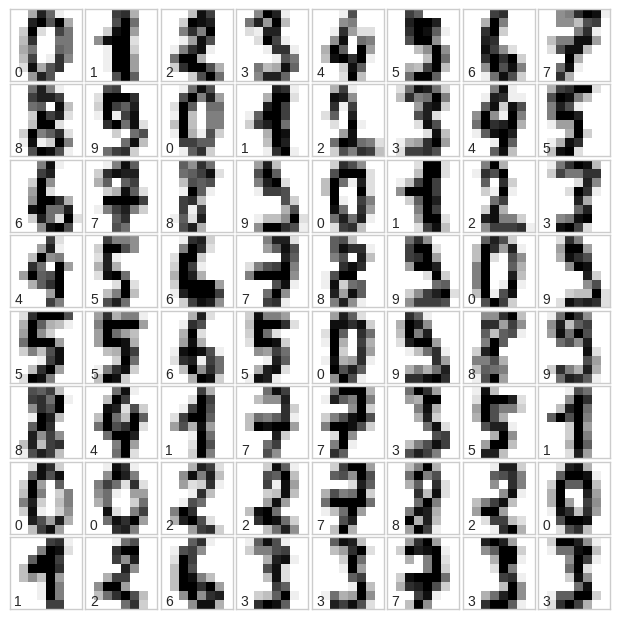

In [4]:
# set up the figure 
fig = plt.figure(
    figsize=(6,6)   # figure size in inches 
)
fig.subplots_adjust(
    left = 0, 
    right = 1, 
    bottom = 0, 
    top = 1, 
    hspace = 0.05, 
    wspace = 0.05 
)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8,8,i+1, xticks=[], yticks=[])
    ax.imshow(
        digits.images[i],
        cmap=plt.cm.binary,
        interpolation="nearest"
    )

    # label the image with the target value 
    ax.text(0,7,str(digits.target[i]))

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

Xtrain, Xtest, ytrain, ytest = train_test_split(
    digits.data, digits.target, random_state=0
)
model = RandomForestClassifier(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

In [6]:
from sklearn import metrics 
print(metrics.classification_report(ypred, ytest))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.98      0.98      0.98        43
           2       0.95      1.00      0.98        42
           3       0.98      0.96      0.97        46
           4       0.97      1.00      0.99        37
           5       0.98      0.96      0.97        49
           6       1.00      1.00      1.00        52
           7       1.00      0.96      0.98        50
           8       0.94      0.98      0.96        46
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



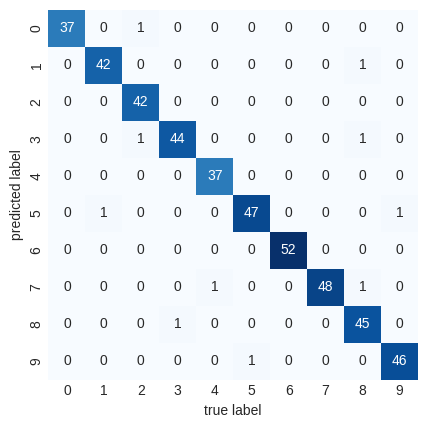

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(ytest, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
cbar=False, cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label');